# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `NYS Oil & Gas Wells` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.

### Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_gaswells.csv')

### Log Transformation of Gas Production
It was essential for analysis that we put our gas production values in a smaller scale without losing its inherent value because various wells produced different amounts of gas (mcf / thousand cubic feet) and some wells produced a lot more than others. We couldn't remove these outliers because we want our model to predict on finding the wells that house the most gas.

In [2]:
df['gas_prod'] = np.log1p(df['gas_prod'])
print('gas_prod\n------------')
print(df['gas_prod'].describe())
print('gas_log1p\n------------')
print(pd.DataFrame(np.expm1(df[['gas_prod']])).describe())
df.rename(columns={'gas_prod':'gas_log1p'}, inplace=True)
print(df.info())
df.head()

gas_prod
------------
count   7,377.00
mean        8.58
std         2.56
min         0.69
25%         7.68
50%         9.36
75%        10.36
max        16.19
Name: gas_prod, dtype: float64
gas_log1p
------------
           gas_prod
count      7,377.00
mean      30,034.74
std      205,015.66
min            1.00
25%        2,168.00
50%       11,610.00
75%       31,710.00
max   10,764,750.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377 entries, 0 to 7376
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas_log1p  7377 non-null   float64
 1   well       7377 non-null   object 
 2   status     7377 non-null   object 
 3   depth      7377 non-null   float64
 4   elevation  7377 non-null   float64
 5   longitude  7377 non-null   float64
 6   latitude   7377 non-null   float64
 7   field      7377 non-null   object 
 8   geology    7377 non-null   object 
dtypes: float64(5), object(4)
memory usage: 518.8+ KB
None


gas_log1p             well             status    depth  elevation  \
0       3.56  oil development             active 1,396.00   1,685.00   
1       3.53  oil development             active 1,280.00   1,640.00   
2       3.64  oil development  plugged abandoned 1,505.00   1,870.00   
3       3.56  oil development             active 1,486.00   1,850.00   
4       3.56  oil development             active 1,379.00   1,710.00   

   longitude  latitude     field                       geology  
0     -78.60     42.01  Bradford  Chipmunk, Bradford 2nd & 3rd  
1     -78.61     42.01  Bradford               Bradford Second  
2     -78.59     42.00  Bradford  Chipmunk, Bradford 2nd & 3rd  
3     -78.60     42.01  Bradford  Chipmunk, Bradford 2nd & 3rd  
4     -78.61     42.01  Bradford  Chipmunk, Bradford 2nd & 3rd

## Feature Understanding

*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GAS_LOG1P
---------------


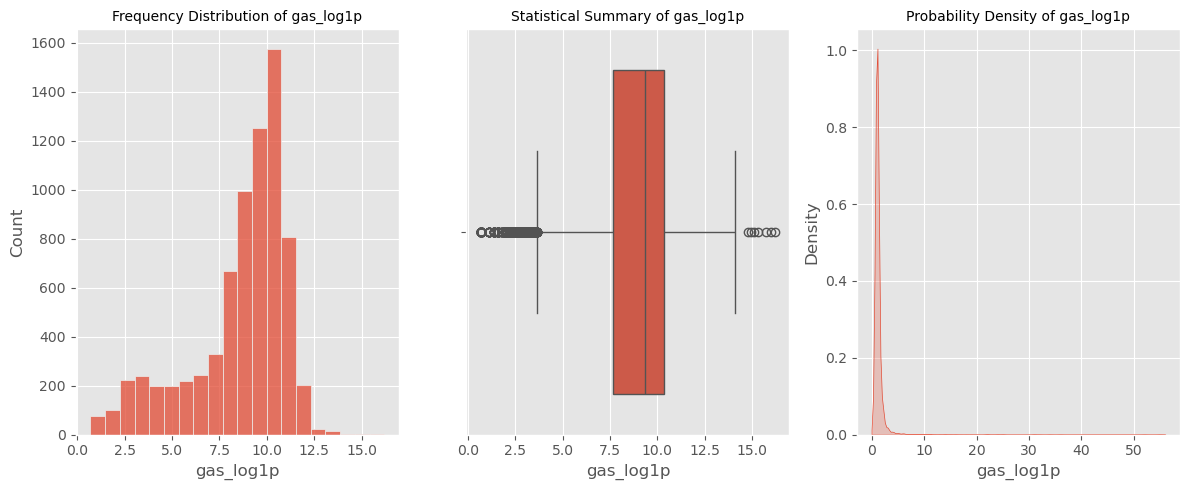


---------------
FEATURE: WELL
---------------


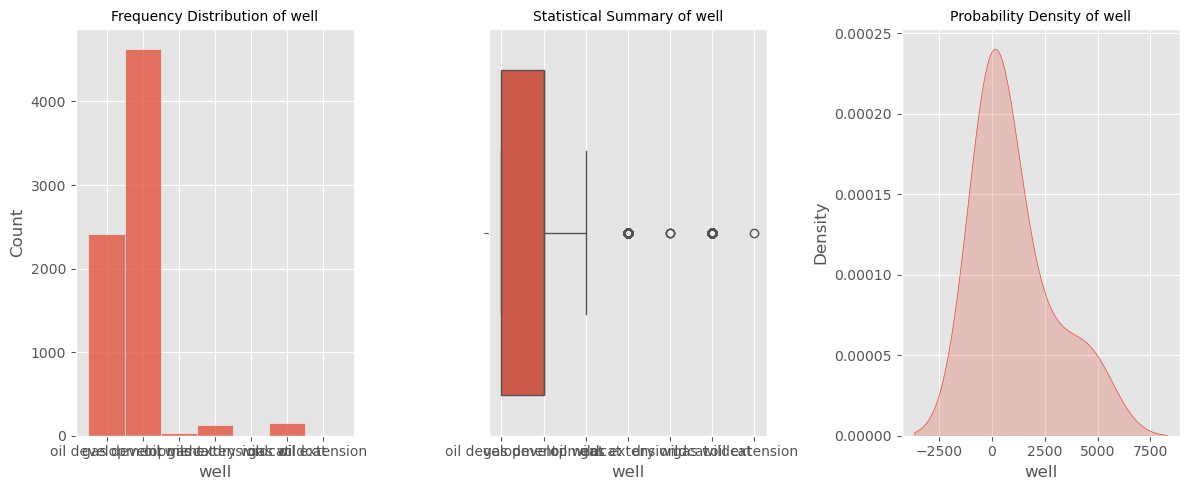


---------------
FEATURE: STATUS
---------------


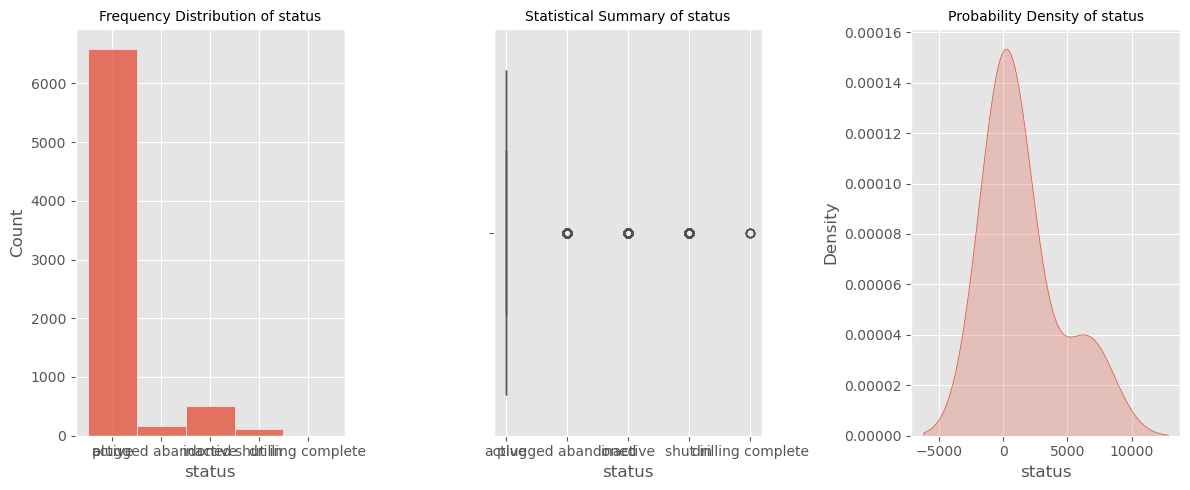


---------------
FEATURE: DEPTH
---------------


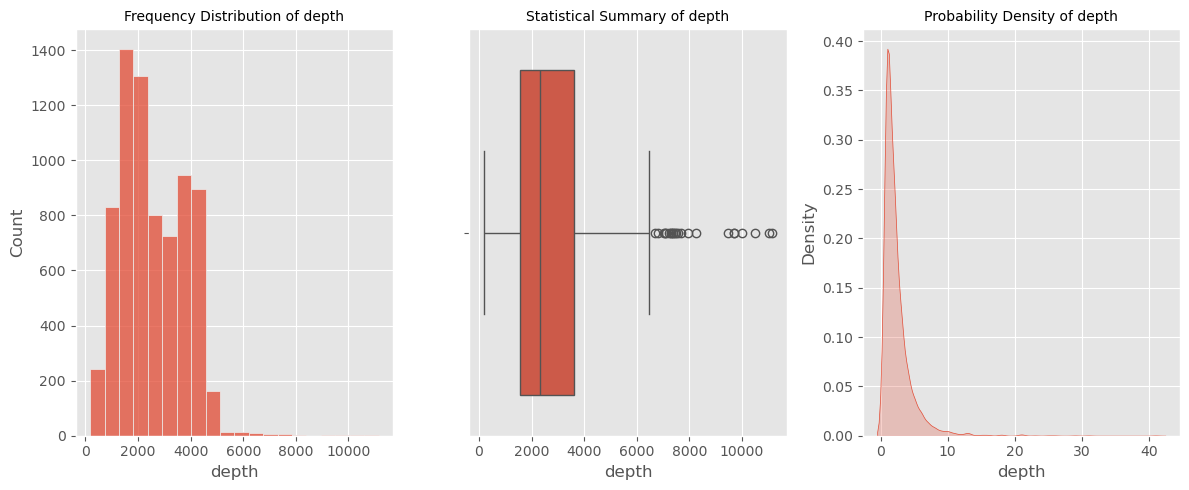


---------------
FEATURE: ELEVATION
---------------


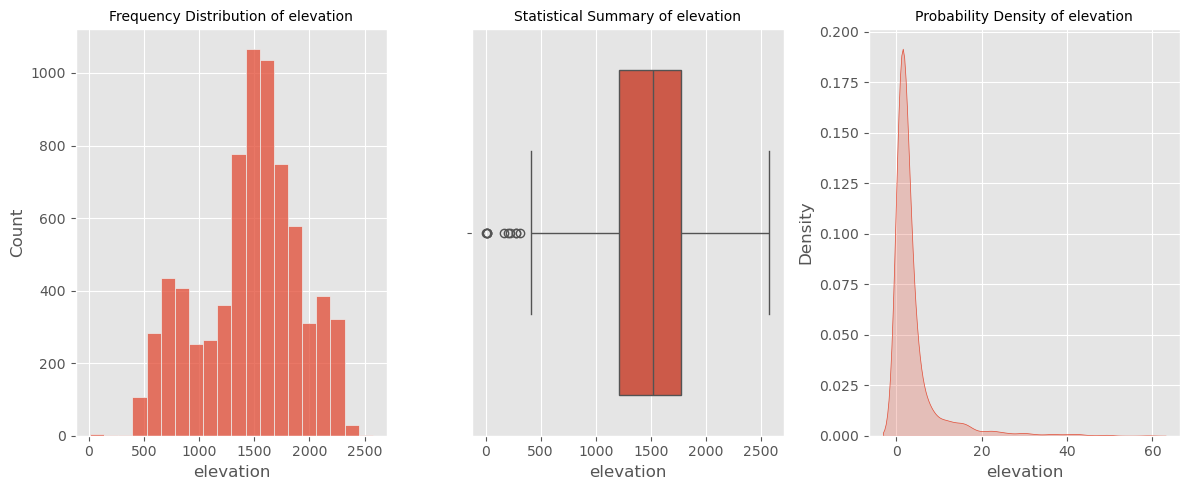


---------------
FEATURE: LONGITUDE
---------------


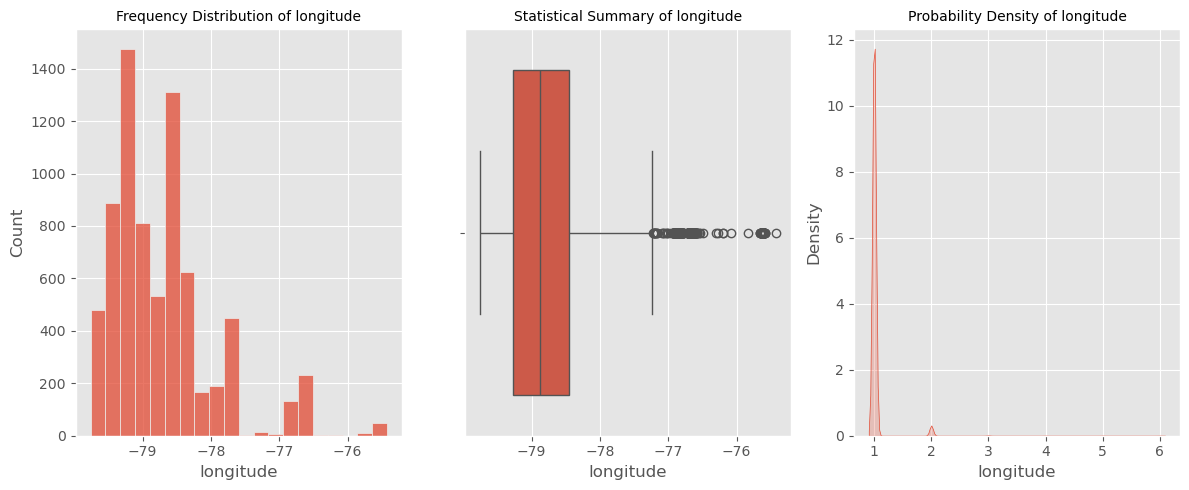


---------------
FEATURE: LATITUDE
---------------


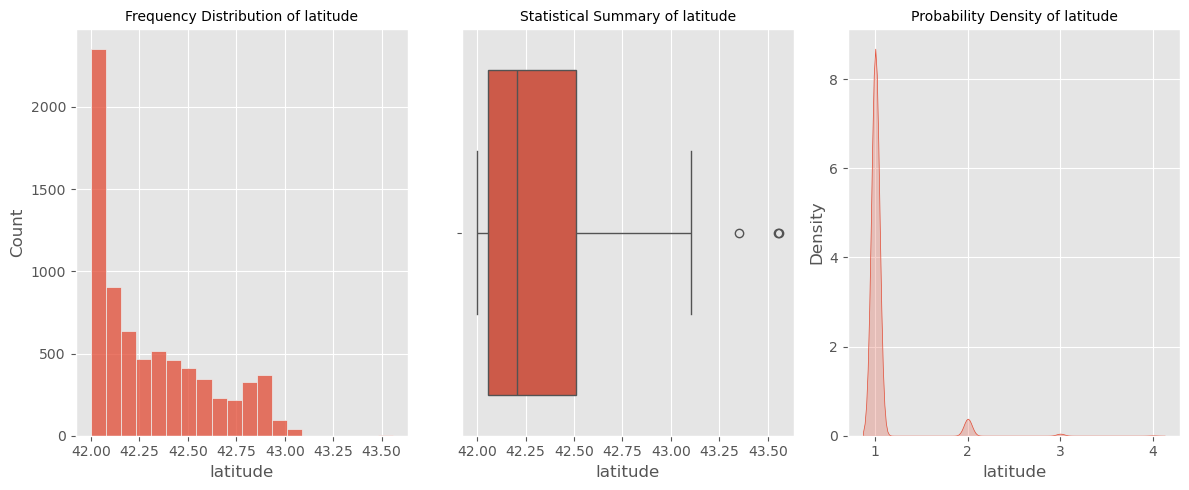


---------------
FEATURE: FIELD
---------------


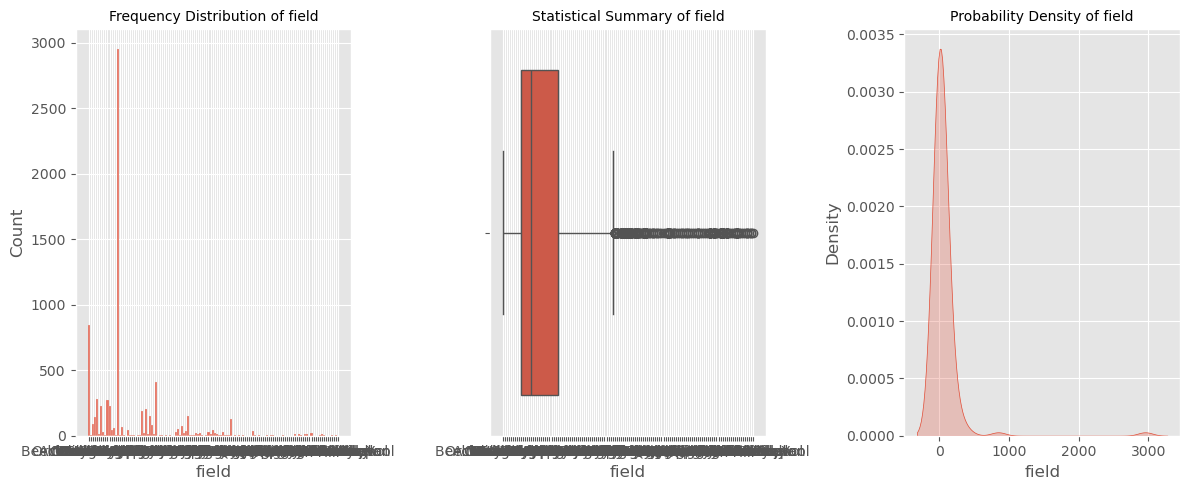


---------------
FEATURE: GEOLOGY
---------------


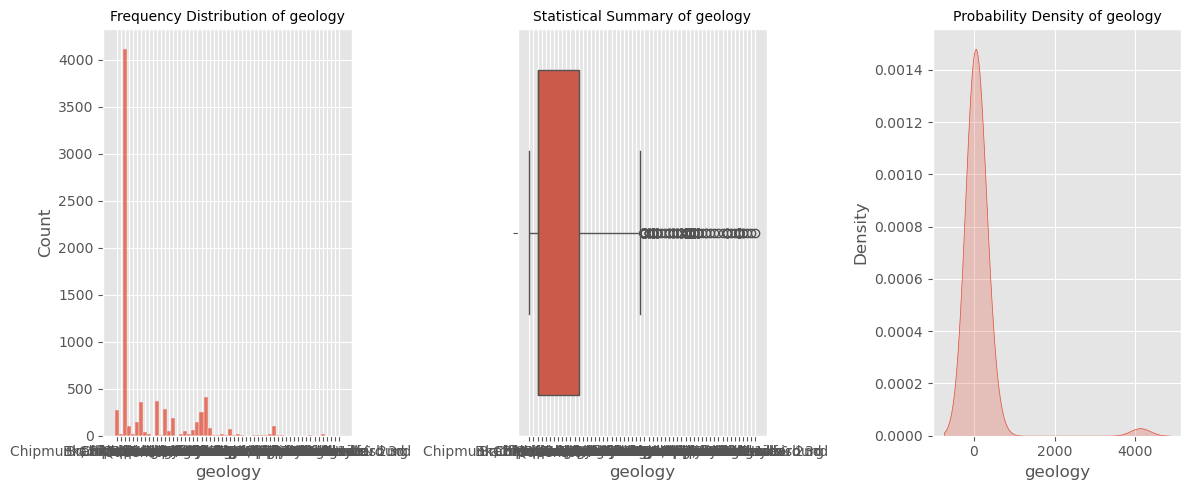

In [3]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
    sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
    ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
    ax1.set_xlabel(column)
    
    sns.boxplot(ax=ax2, x=df[column])
    ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
    ax2.set_xlabel(column)

    sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
    ax3.set_title(f'Probability Density of {column}', fontsize=10)
    ax3.set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Lineplots / Time
- Groupby Comparisons

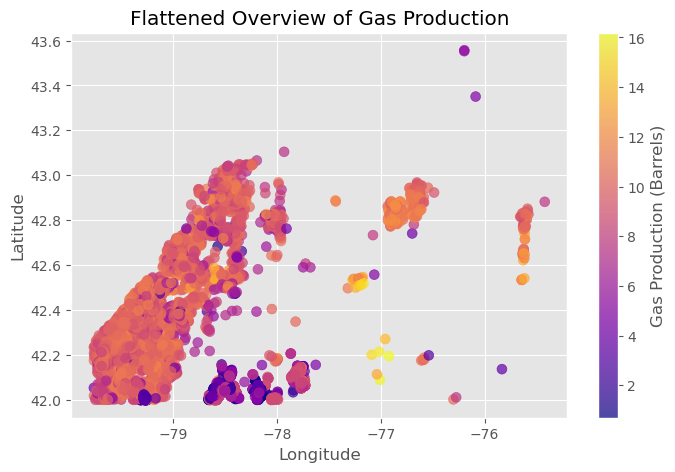

In [4]:
fig, ax = plt.subplots(1, figsize=(8,5))
corr_plot = ax.scatter(np.array(df['longitude']), np.array(df['latitude']), 
                       s=50, c=np.array(df['gas_log1p']).flatten(), cmap='plasma', alpha=0.7)
plt.colorbar(corr_plot).set_label('Gas Production (Barrels)')
plt.title('Flattened Overview of Gas Production')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.close()

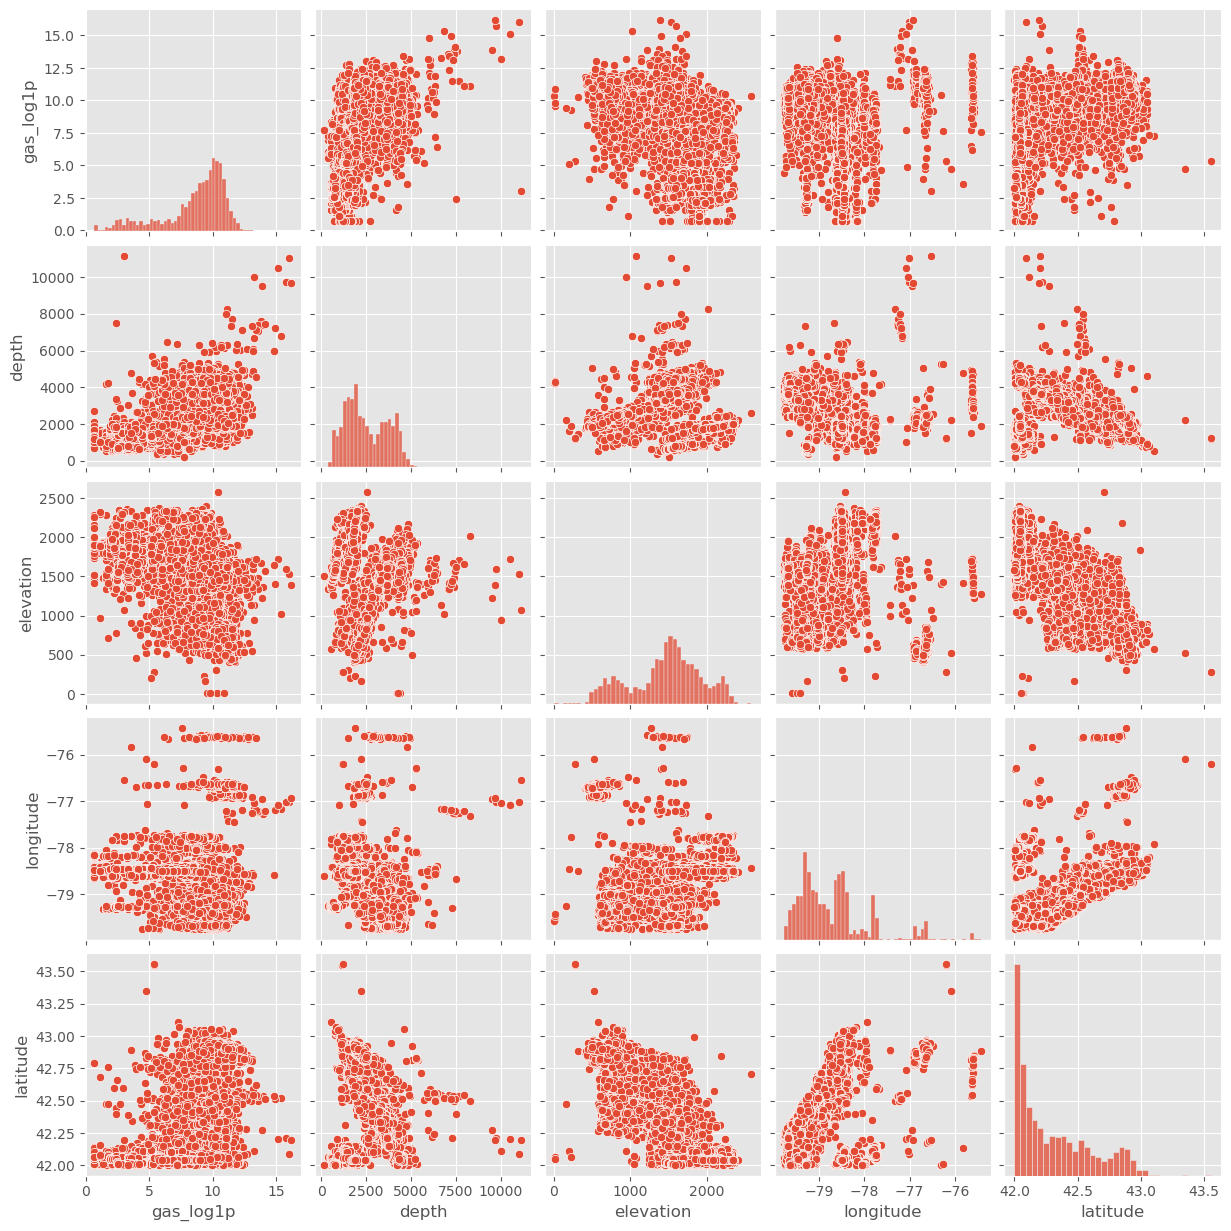

In [5]:
sns.pairplot(df)
plt.show()
plt.close()

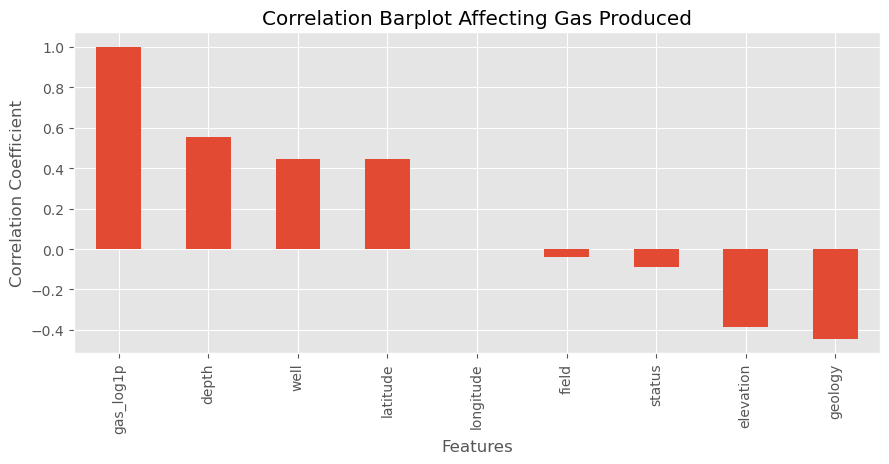

In [6]:
corr = df.copy()
label_mapping = {}

for column in corr.columns:
    if corr[column].dtype == 'O':
        unique_values = corr[column].unique()
        mapping = {value: i + 1 for i, value in enumerate(unique_values)}
        label_mapping[column] = mapping
        corr[column] = corr[column].map(mapping)

corr.corr()['gas_log1p'].sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Correlation Barplot Affecting Gas Produced')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
plt.close()

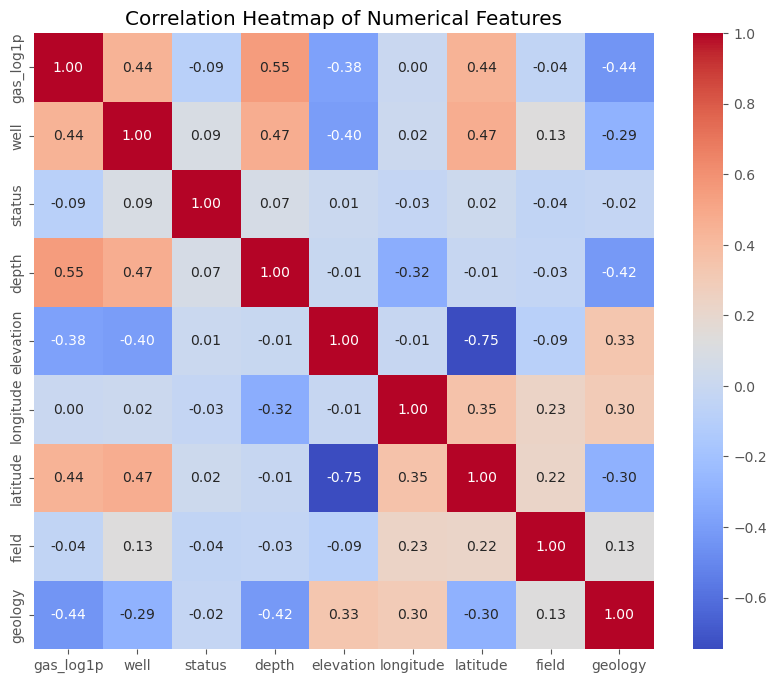

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
plt.close()

#### Groupby Comparisons

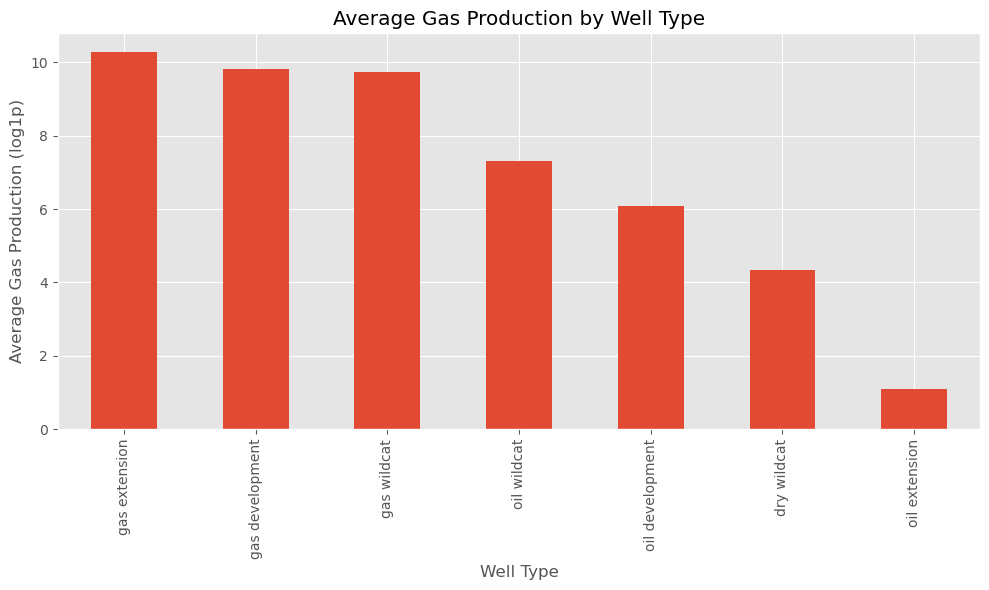

In [8]:
gas_by_well_type = df.groupby('well')['gas_log1p'].mean().sort_values(ascending=False)
gas_by_well_type.plot(kind='bar', figsize=(10, 6))
plt.title('Average Gas Production by Well Type')
plt.ylabel('Average Gas Production (log1p)')
plt.xlabel('Well Type')
plt.tight_layout()
plt.show()
plt.close()

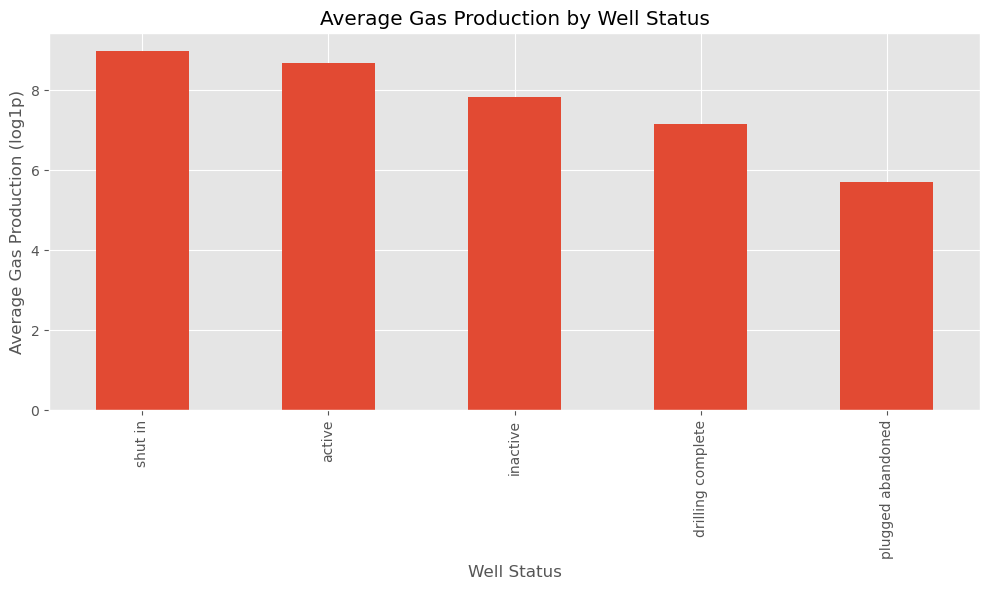

In [9]:
gas_by_status = df.groupby('status')['gas_log1p'].mean().sort_values(ascending=False)
gas_by_status.plot(kind='bar', figsize=(10, 6))
plt.title('Average Gas Production by Well Status')
plt.ylabel('Average Gas Production (log1p)')
plt.xlabel('Well Status')
plt.tight_layout()
plt.show()
plt.close()

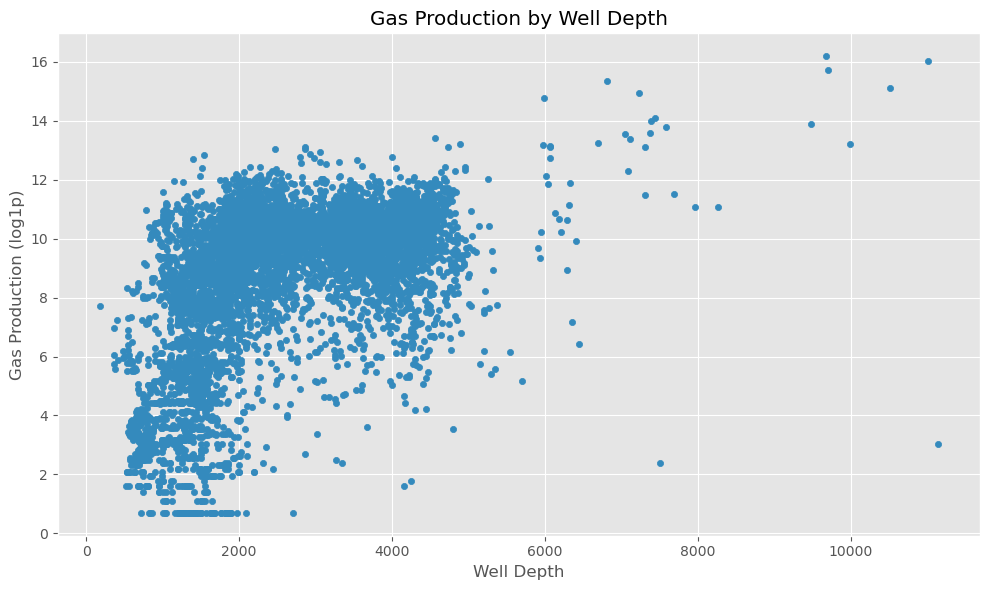

In [10]:
df.plot.scatter(x='depth', y='gas_log1p', figsize=(10, 6))
plt.title('Gas Production by Well Depth')
plt.ylabel('Gas Production (log1p)')
plt.xlabel('Well Depth')
plt.tight_layout()
plt.show()
plt.close()

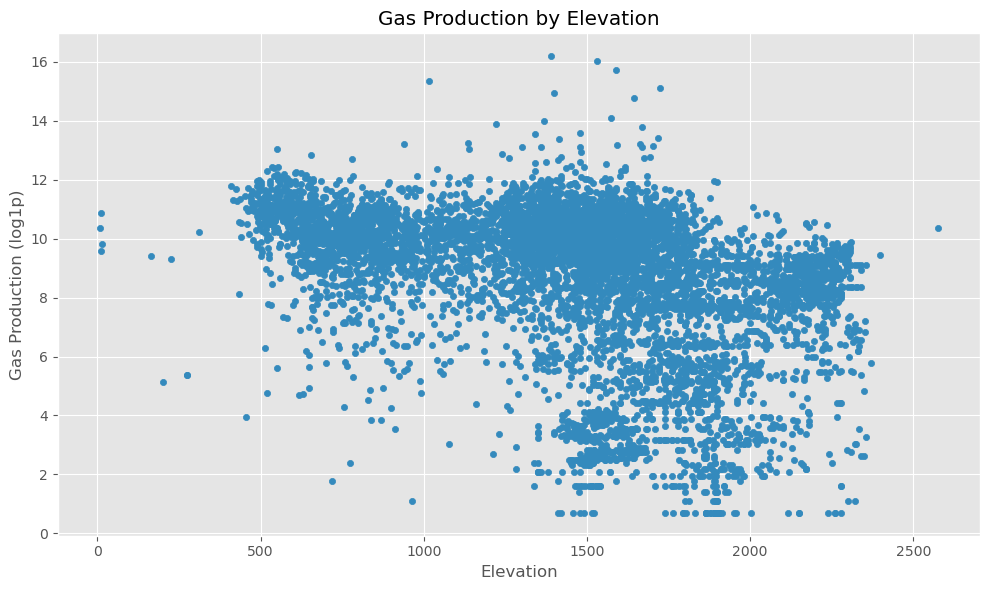

In [11]:
df.plot.scatter(x='elevation', y='gas_log1p', figsize=(10, 6))
plt.title('Gas Production by Elevation')
plt.ylabel('Gas Production (log1p)')
plt.xlabel('Elevation')
plt.tight_layout()
plt.show()
plt.close()

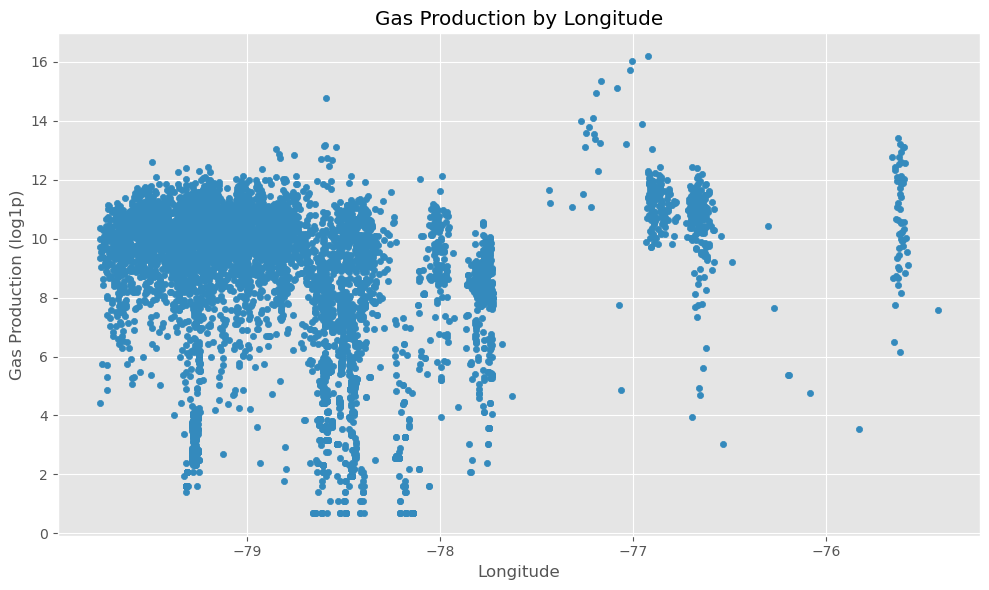

In [12]:
df.plot.scatter(x='longitude', y='gas_log1p', figsize=(10, 6))
plt.title('Gas Production by Longitude')
plt.ylabel('Gas Production (log1p)')
plt.xlabel('Longitude')
plt.tight_layout()
plt.show()
plt.close()

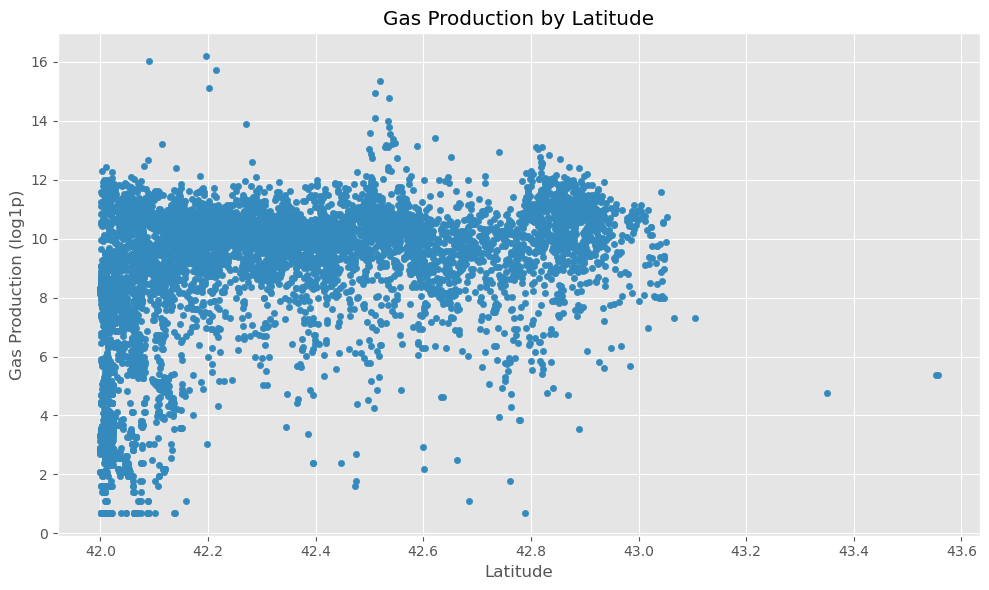

In [13]:
df.plot.scatter(x='latitude', y='gas_log1p', figsize=(10, 6))
plt.title('Gas Production by Latitude')
plt.ylabel('Gas Production (log1p)')
plt.xlabel('Latitude')
plt.tight_layout()
plt.show()
plt.close()

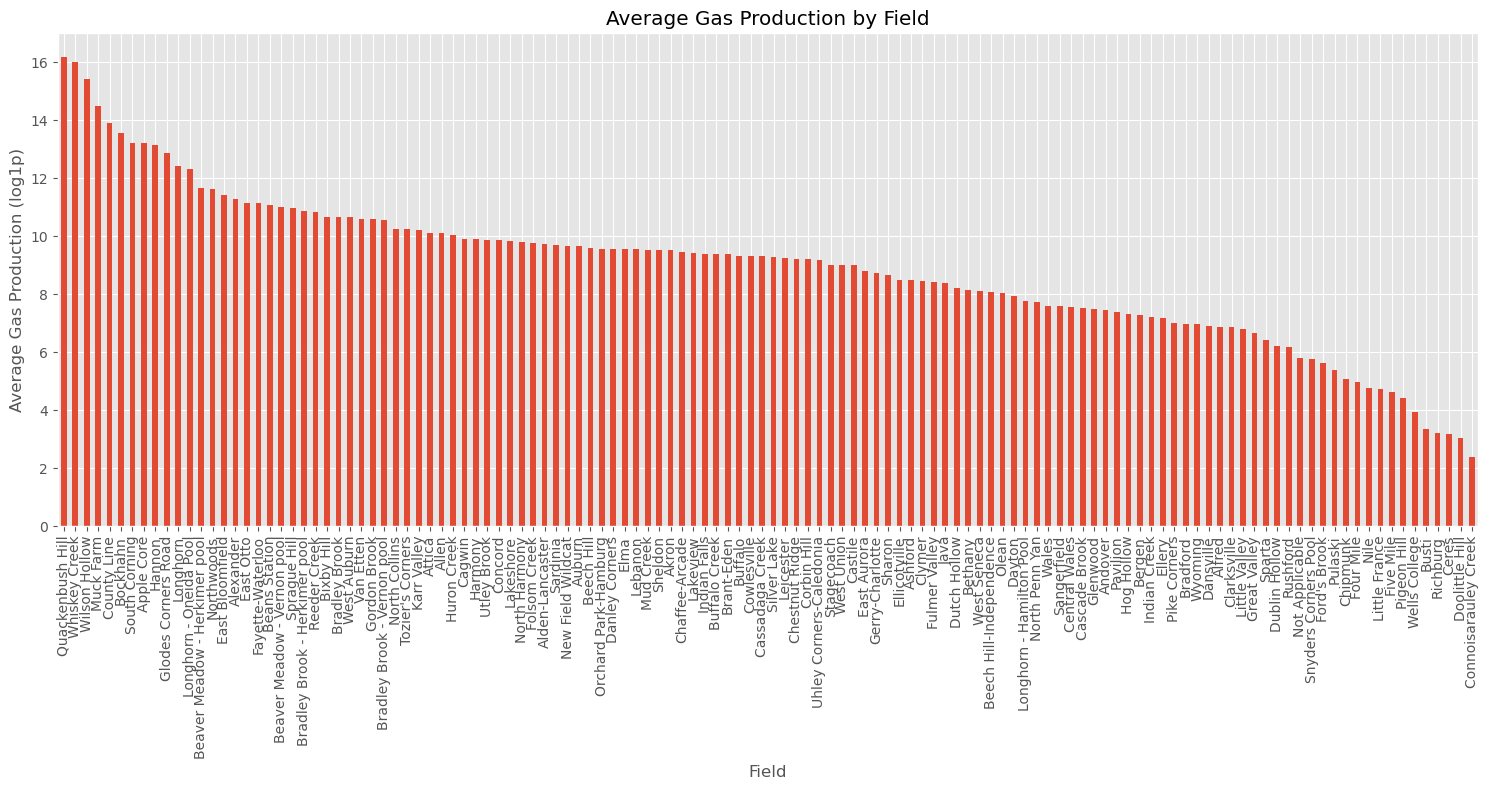

In [14]:
gas_by_field = df.groupby('field')['gas_log1p'].mean().sort_values(ascending=False)
gas_by_field.plot(kind='bar', figsize=(15, 8))
plt.title('Average Gas Production by Field')
plt.ylabel('Average Gas Production (log1p)')
plt.xlabel('Field')
plt.tight_layout()
plt.show()
plt.close()

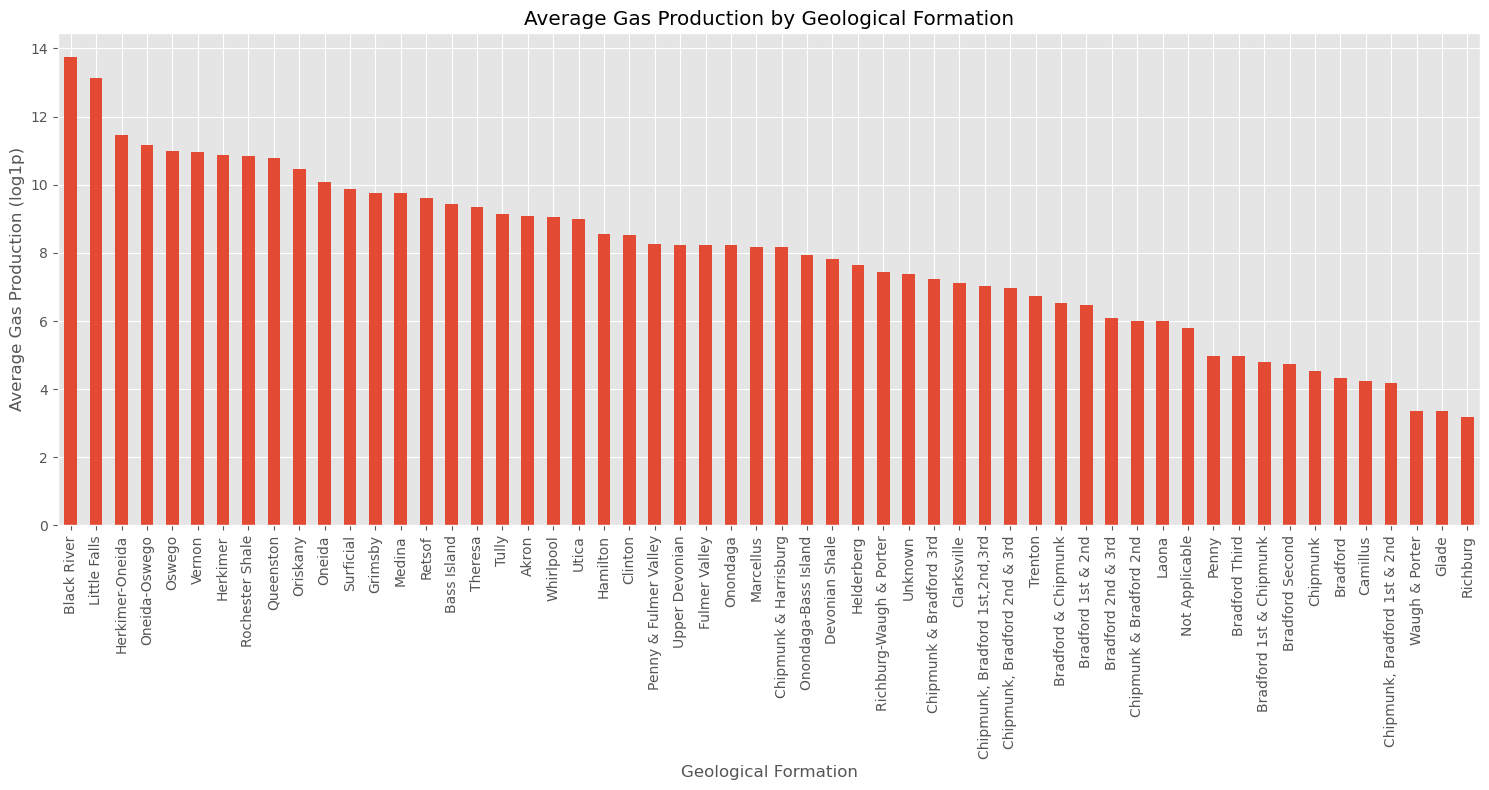

In [15]:
gas_by_geology = df.groupby('geology')['gas_log1p'].mean().sort_values(ascending=False)
gas_by_geology.plot(kind='bar', figsize=(15, 8))
plt.title('Average Gas Production by Geological Formation')
plt.ylabel('Average Gas Production (log1p)')
plt.xlabel('Geological Formation')
plt.tight_layout()
plt.show()
plt.close()

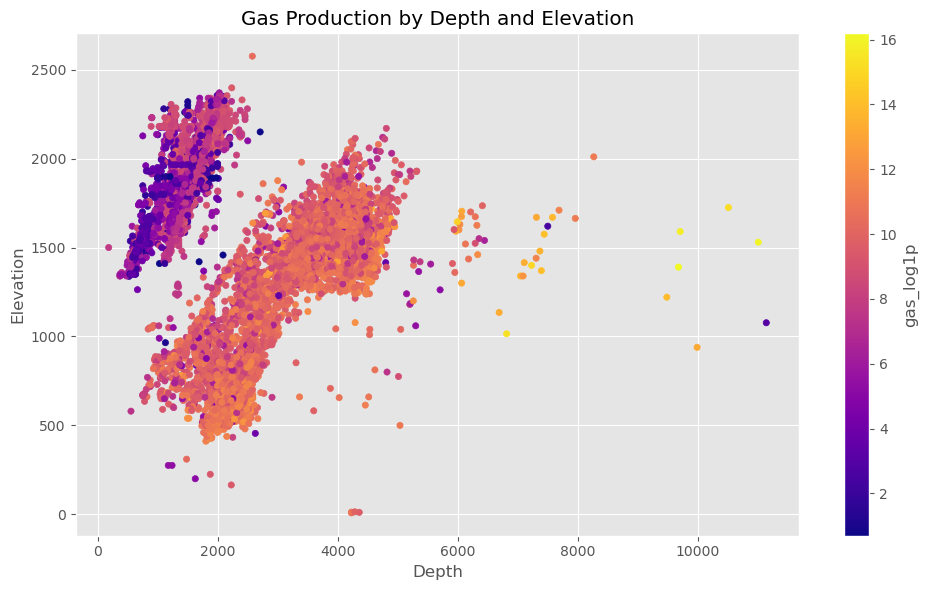

In [16]:
df.plot.scatter(x='depth', y='elevation', c='gas_log1p', cmap='plasma', figsize=(10, 6))
plt.title('Gas Production by Depth and Elevation')
plt.ylabel('Elevation')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()
plt.close()

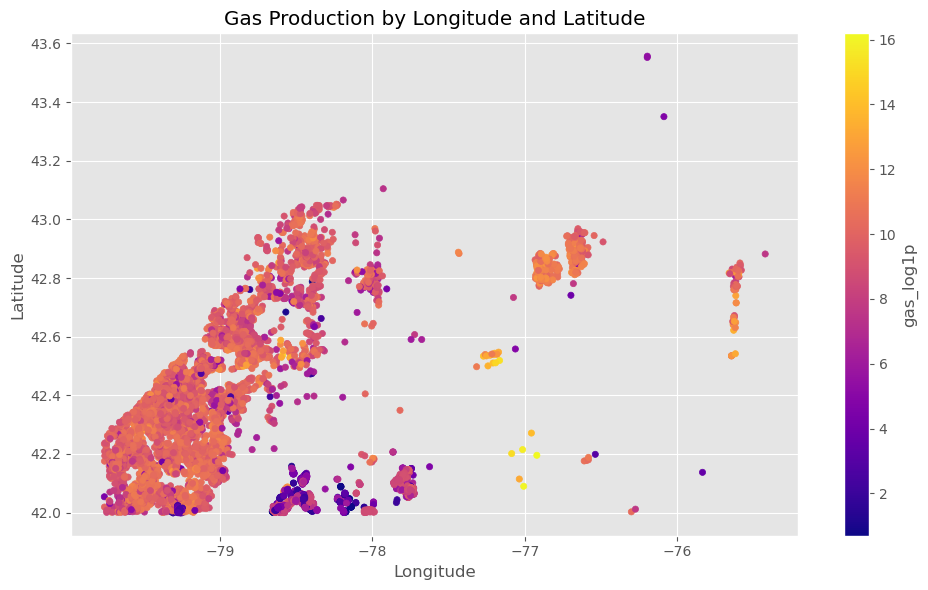

In [17]:
df.plot.scatter(x='longitude', y='latitude', c='gas_log1p', cmap='plasma', figsize=(10, 6))
plt.title('Gas Production by Longitude and Latitude')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.tight_layout()
plt.show()
plt.close()

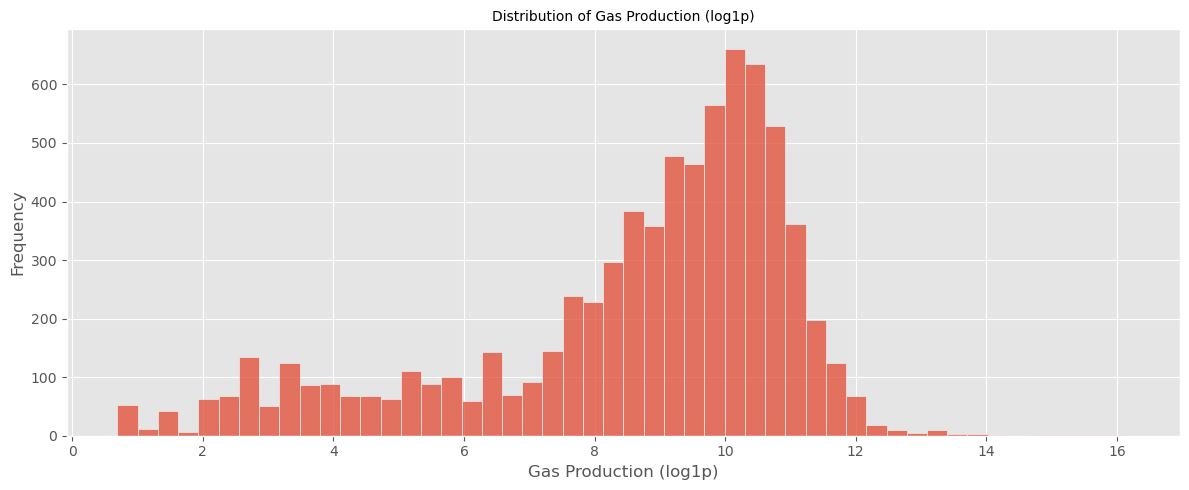

In [18]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.histplot(data=df['gas_log1p'], kde=False, bins=50, ax=ax)
ax.set_title('Distribution of Gas Production (log1p)', fontsize=10)
ax.set_xlabel('Gas Production (log1p)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.close()

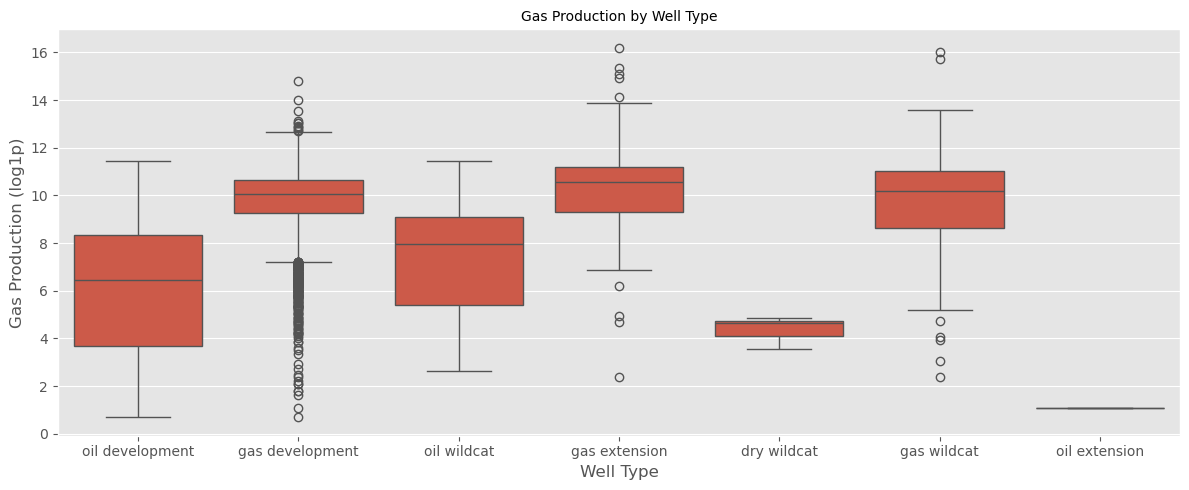

In [19]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='well', y='gas_log1p', data=df, ax=ax)
ax.set_title('Gas Production by Well Type', fontsize=10)
ax.set_xlabel('Well Type')
ax.set_ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()

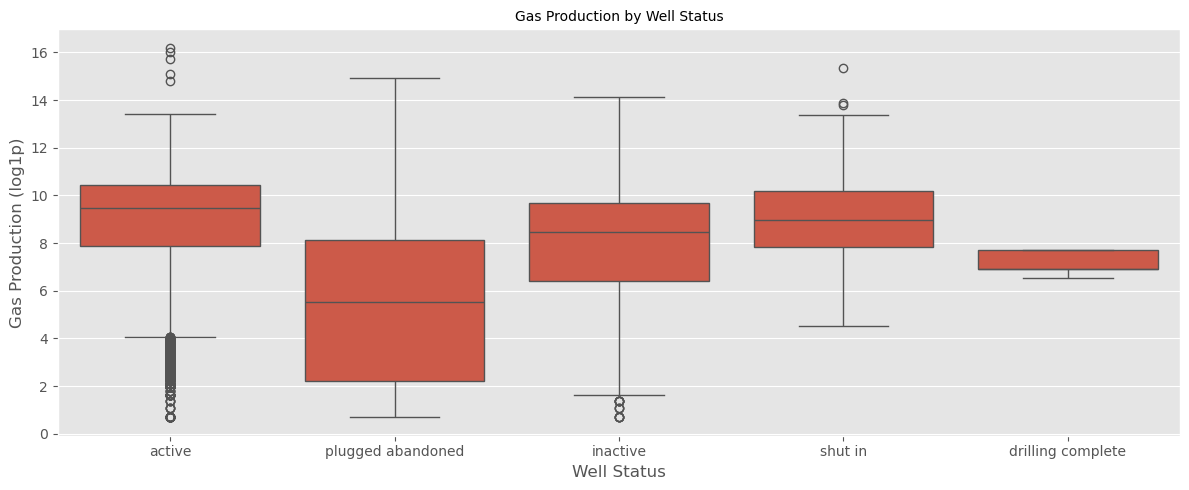

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='status', y='gas_log1p', data=df, ax=ax)
ax.set_title('Gas Production by Well Status', fontsize=10)
ax.set_xlabel('Well Status')
ax.set_ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()

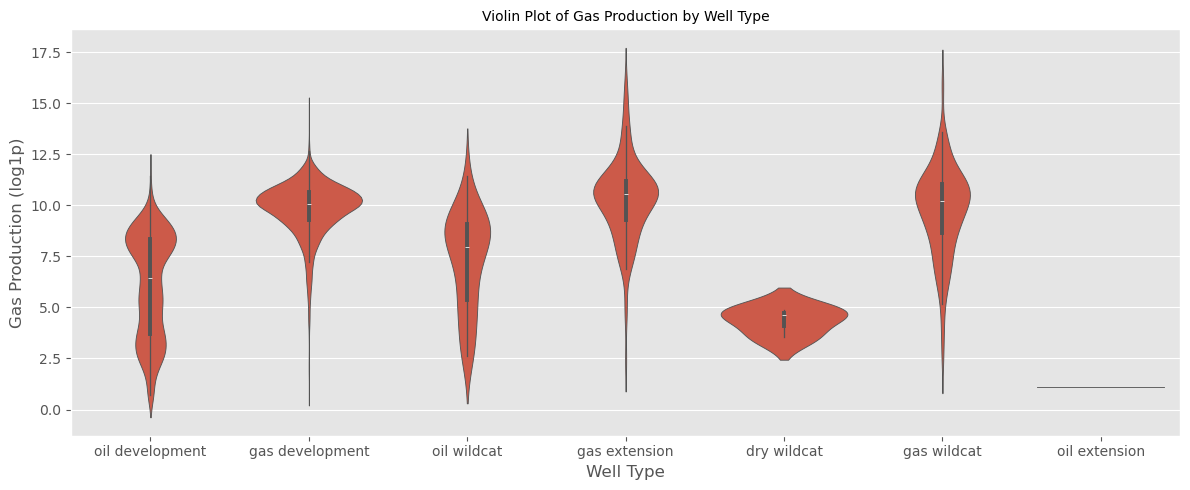

In [21]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.violinplot(x='well', y='gas_log1p', data=df, ax=ax)
ax.set_title('Violin Plot of Gas Production by Well Type', fontsize=10)
ax.set_xlabel('Well Type')
ax.set_ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()

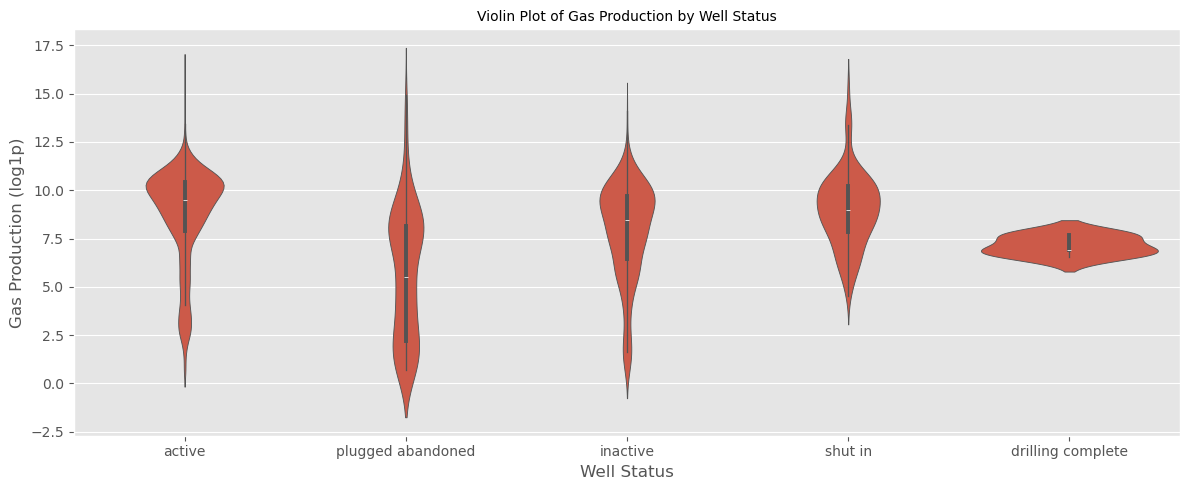

In [22]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.violinplot(x='status', y='gas_log1p', data=df, ax=ax)
ax.set_title('Violin Plot of Gas Production by Well Status', fontsize=10)
ax.set_xlabel('Well Status')
ax.set_ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()

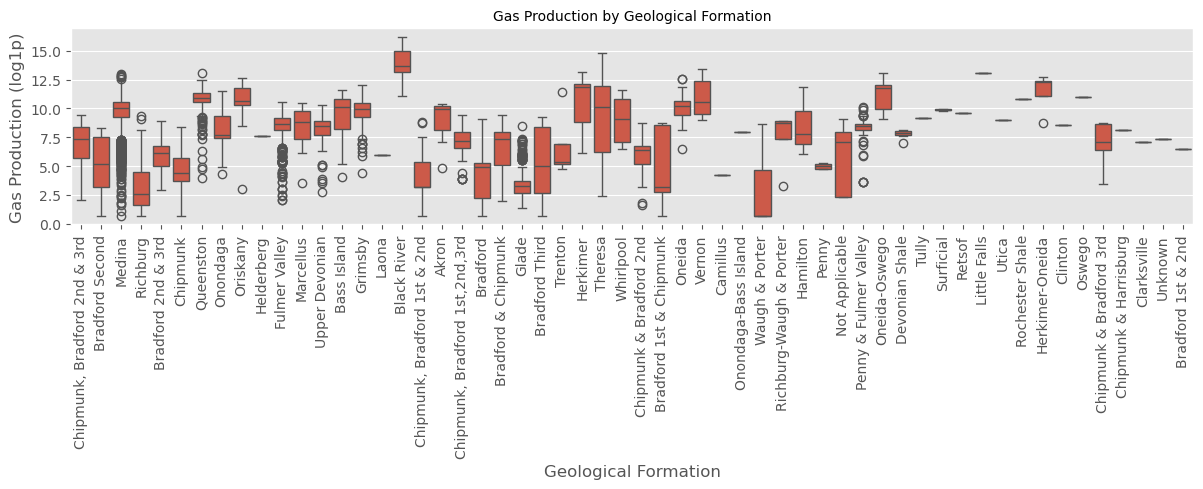

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.boxplot(x='geology', y='gas_log1p', data=df, ax=ax)
ax.set_title('Gas Production by Geological Formation', fontsize=10)
ax.set_xlabel('Geological Formation')
ax.set_ylabel('Gas Production (log1p)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

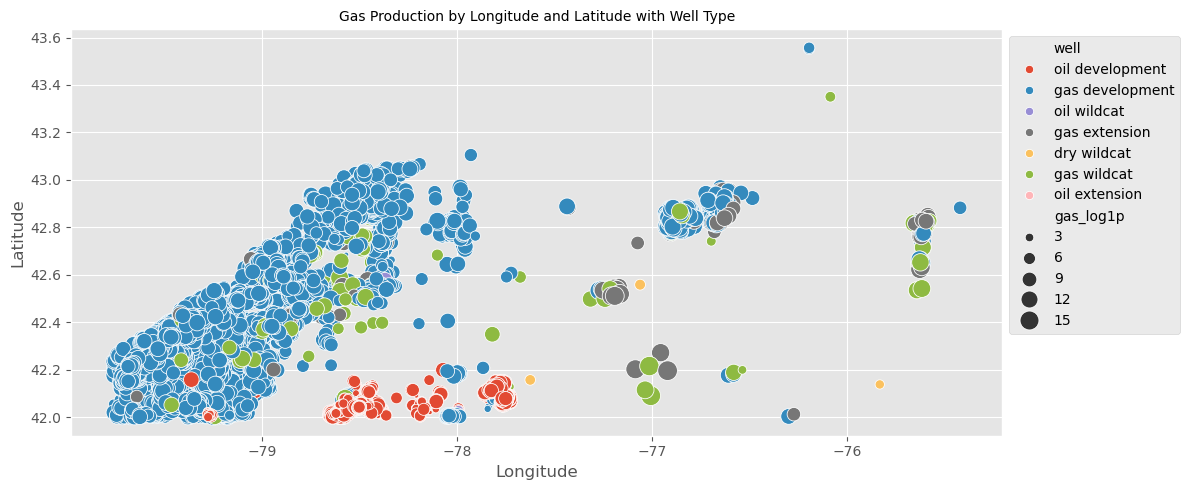

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.scatterplot(x='longitude', y='latitude', hue='well', size='gas_log1p', data=df, sizes=(10, 200), ax=ax)
ax.set_title('Gas Production by Longitude and Latitude with Well Type', fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

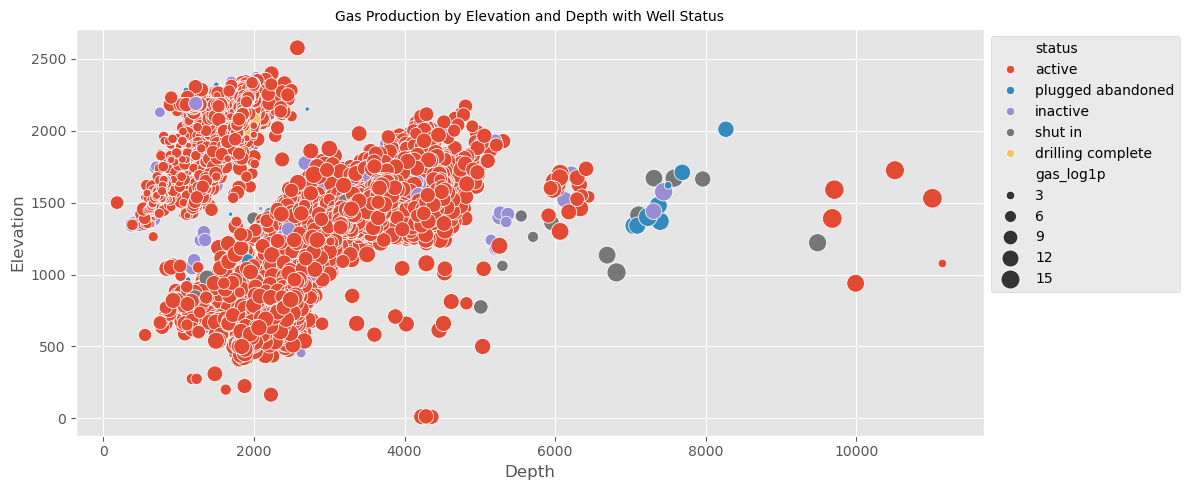

In [25]:
fig, ax = plt.subplots(1, figsize=(12, 5))
sns.scatterplot(x='depth', y='elevation', hue='status', size='gas_log1p', data=df, sizes=(10, 200), ax=ax)
ax.set_title('Gas Production by Elevation and Depth with Well Status', fontsize=10)
ax.set_xlabel('Depth')
ax.set_ylabel('Elevation')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

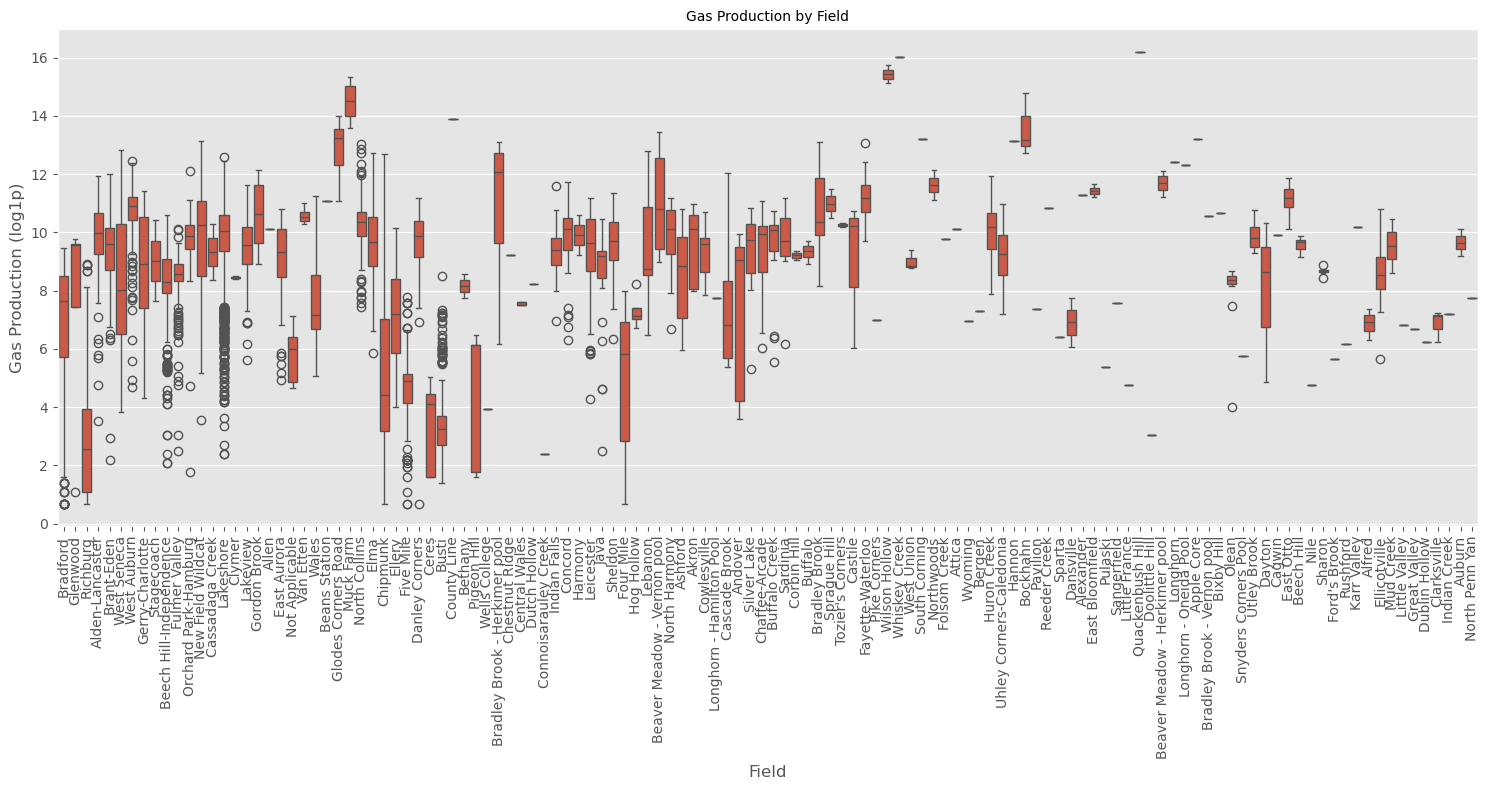

In [26]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.boxplot(x='field', y='gas_log1p', data=df, ax=ax)
ax.set_title('Gas Production by Field', fontsize=10)
ax.set_xlabel('Field')
ax.set_ylabel('Gas Production (log1p)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

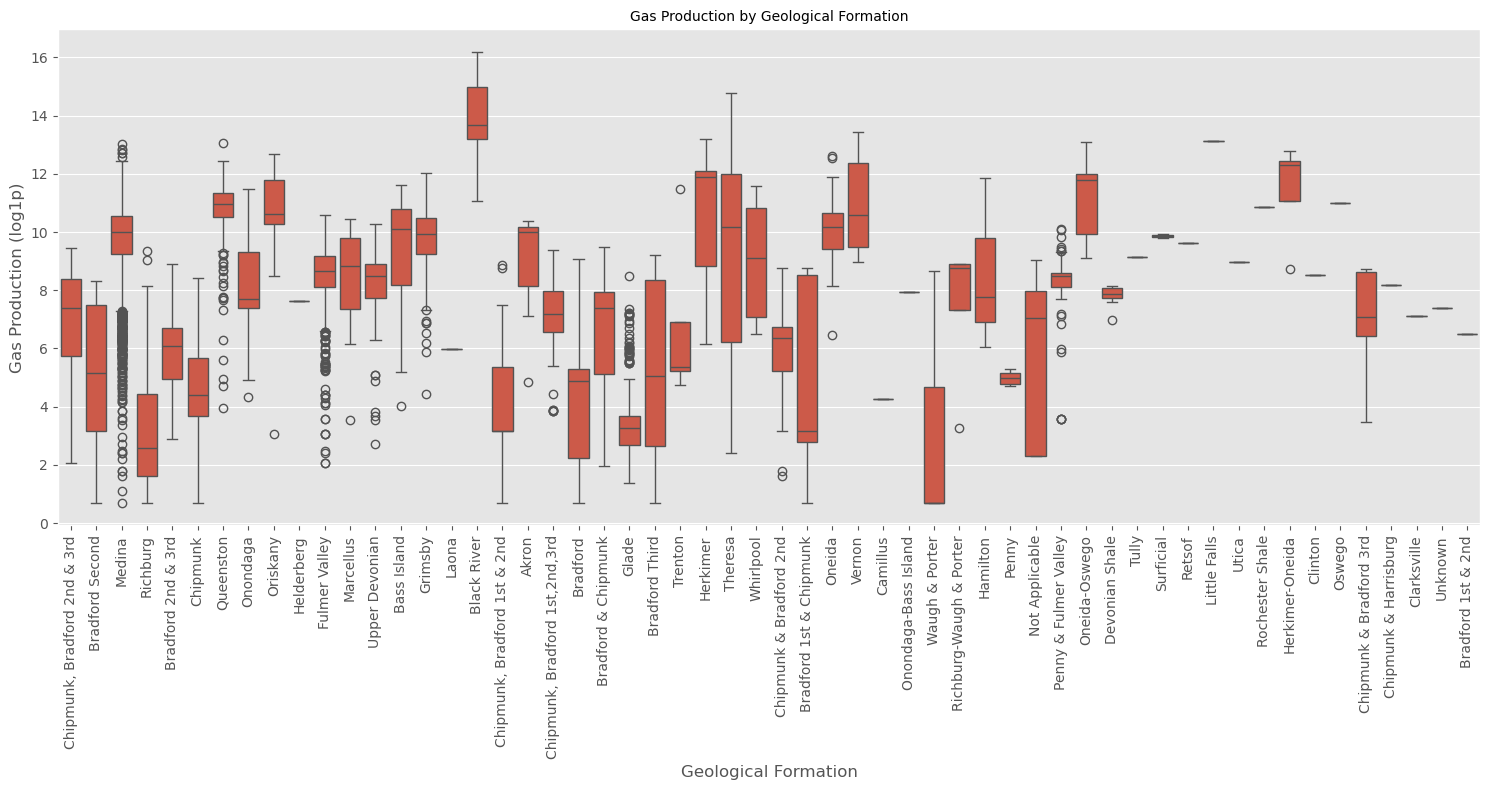

In [27]:
fig, ax = plt.subplots(1, figsize=(15, 8))
sns.boxplot(x='geology', y='gas_log1p', data=df, ax=ax)
ax.set_title('Gas Production by Geological Formation', fontsize=10)
ax.set_xlabel('Geological Formation')
ax.set_ylabel('Gas Production (log1p)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

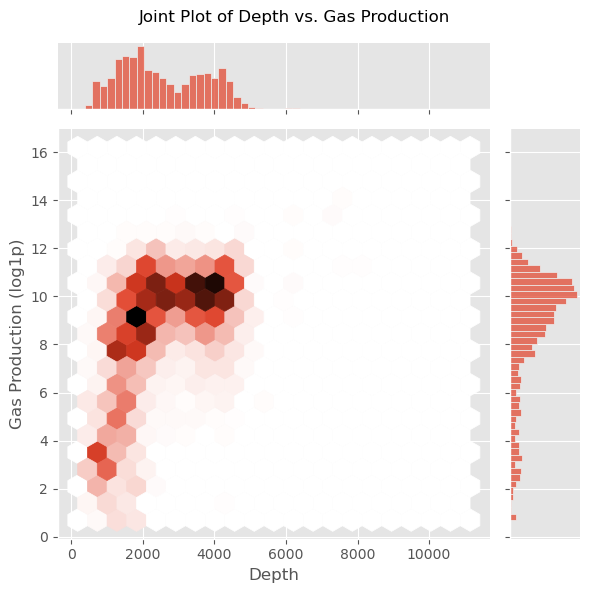

In [28]:
sns.jointplot(x='depth', y='gas_log1p', data=df, kind='hex', gridsize=20)
plt.suptitle('Joint Plot of Depth vs. Gas Production')
plt.xlabel('Depth')
plt.ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()

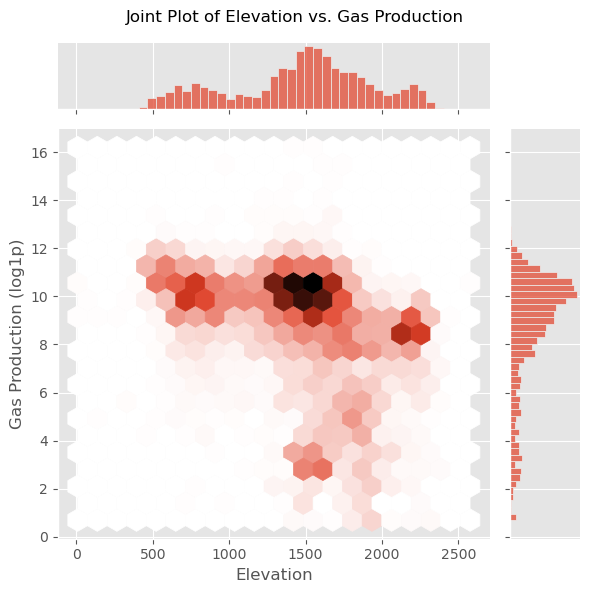

In [29]:
sns.jointplot(x='elevation', y='gas_log1p', data=df, kind='hex', gridsize=20)
plt.suptitle('Joint Plot of Elevation vs. Gas Production')
plt.xlabel('Elevation')
plt.ylabel('Gas Production (log1p)')
plt.tight_layout()
plt.show()
plt.close()


---------------
FEATURE: WELL
---------------


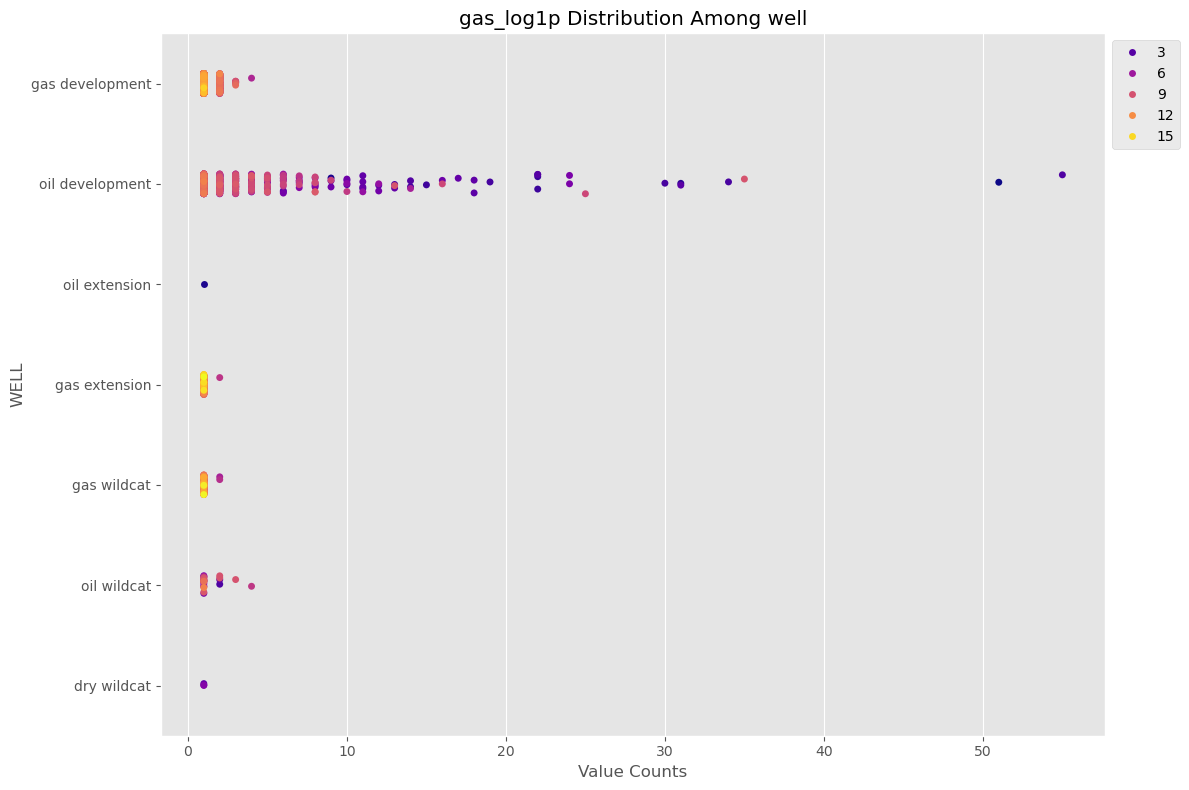


---------------
FEATURE: STATUS
---------------


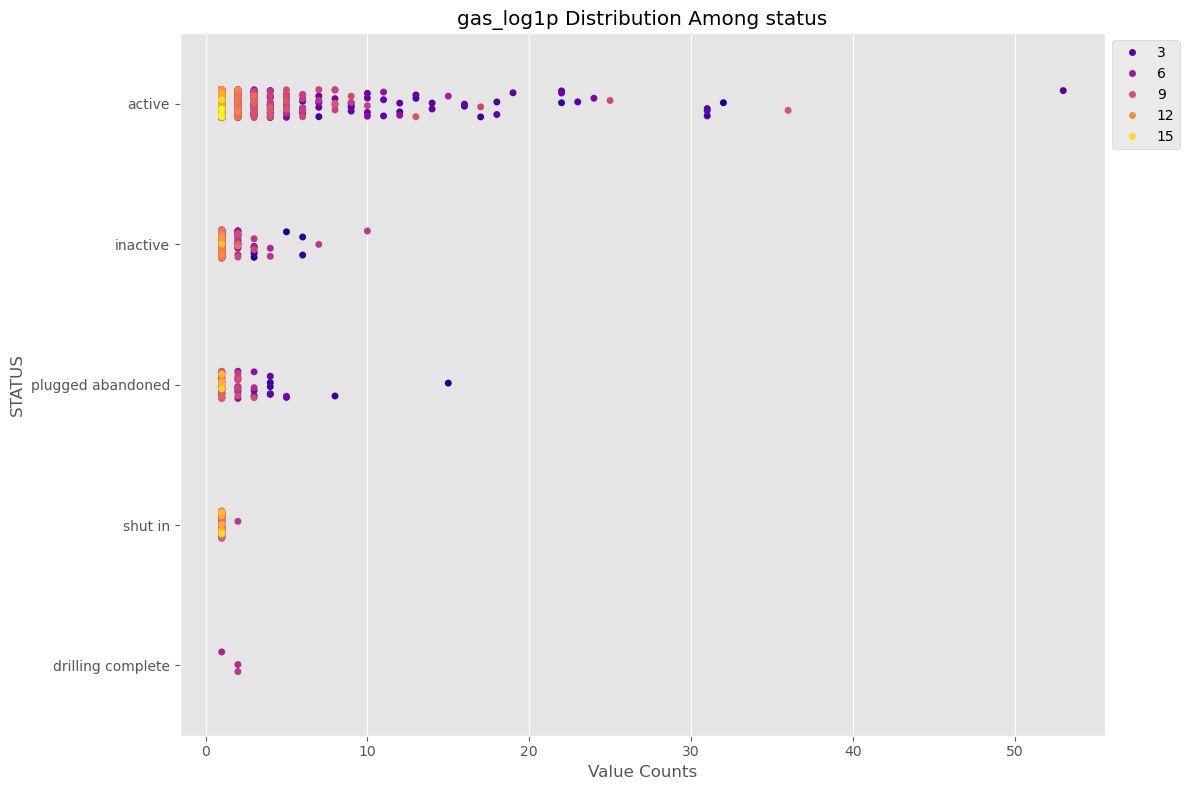


---------------
FEATURE: DEPTH
---------------


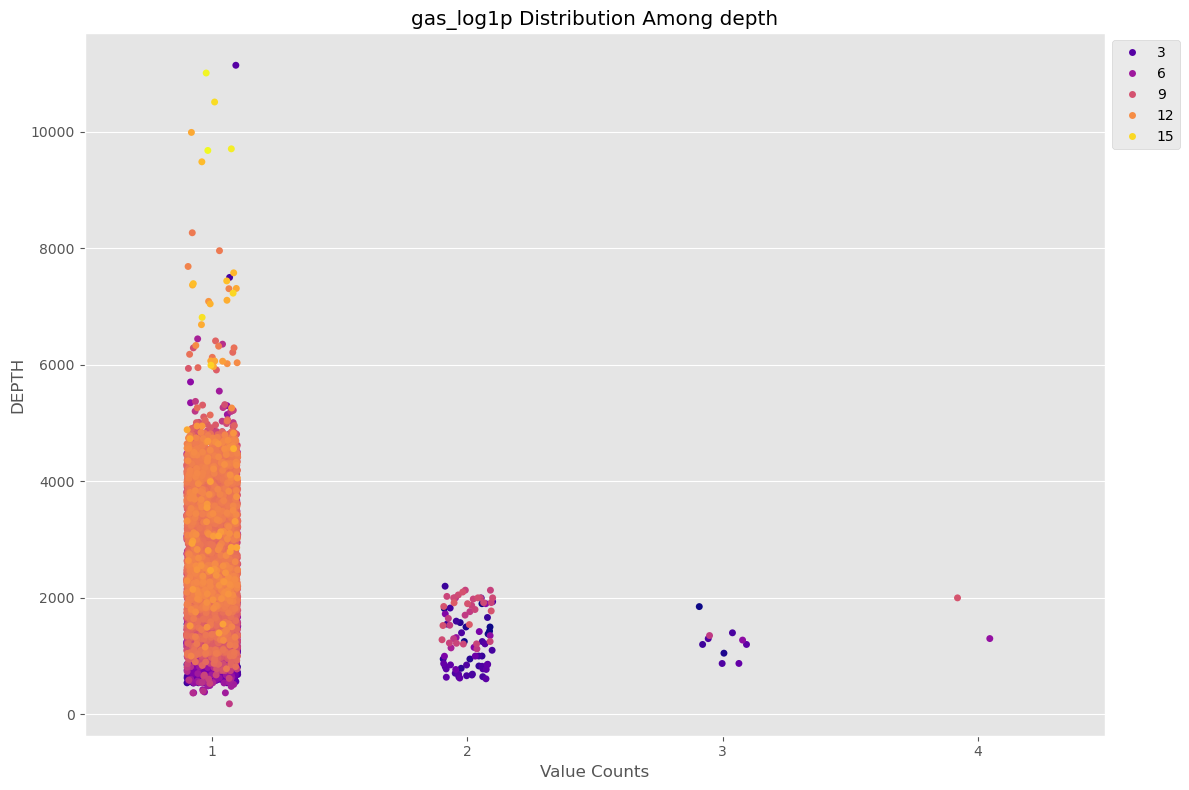


---------------
FEATURE: ELEVATION
---------------


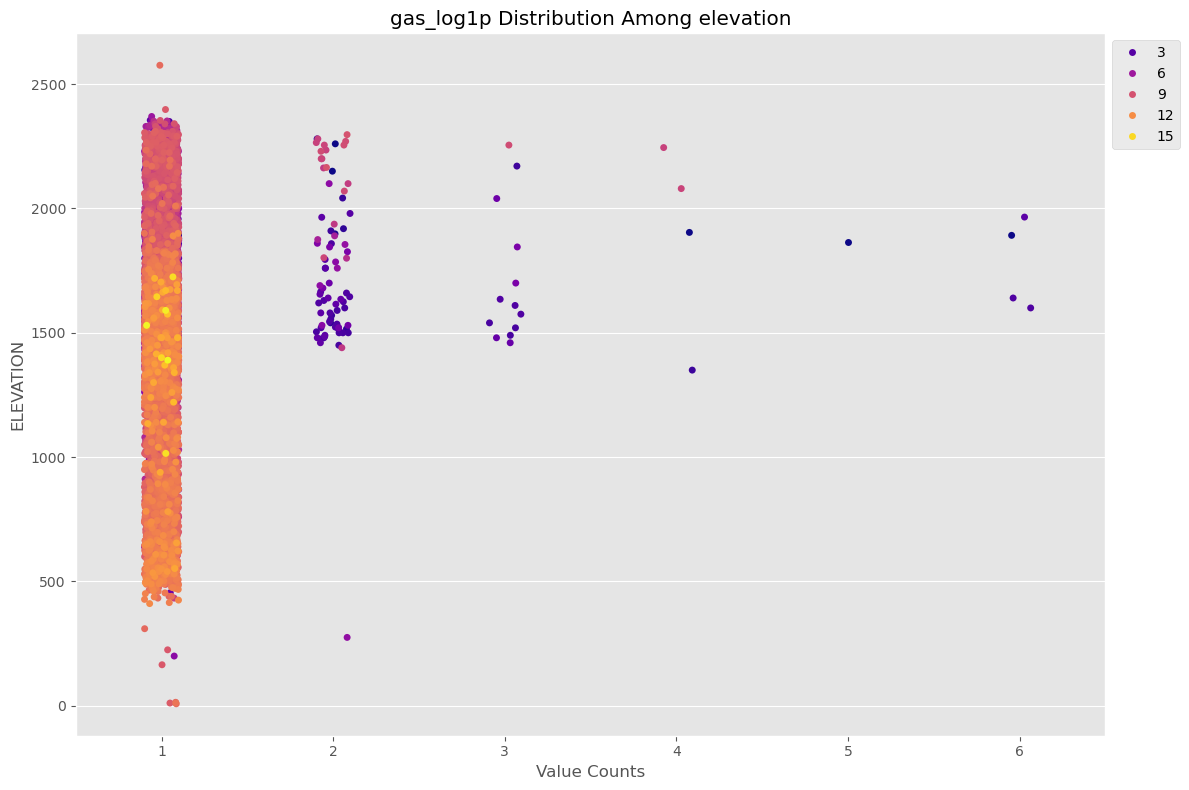


---------------
FEATURE: LONGITUDE
---------------


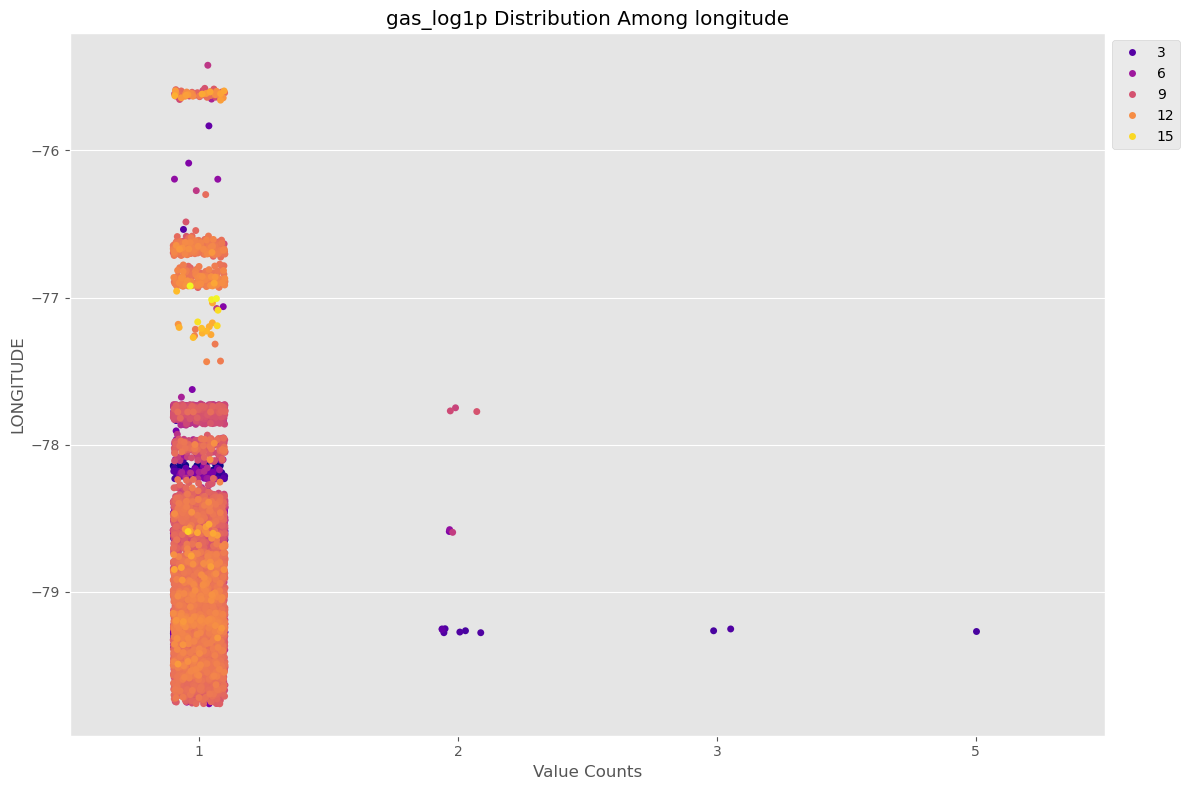


---------------
FEATURE: LATITUDE
---------------


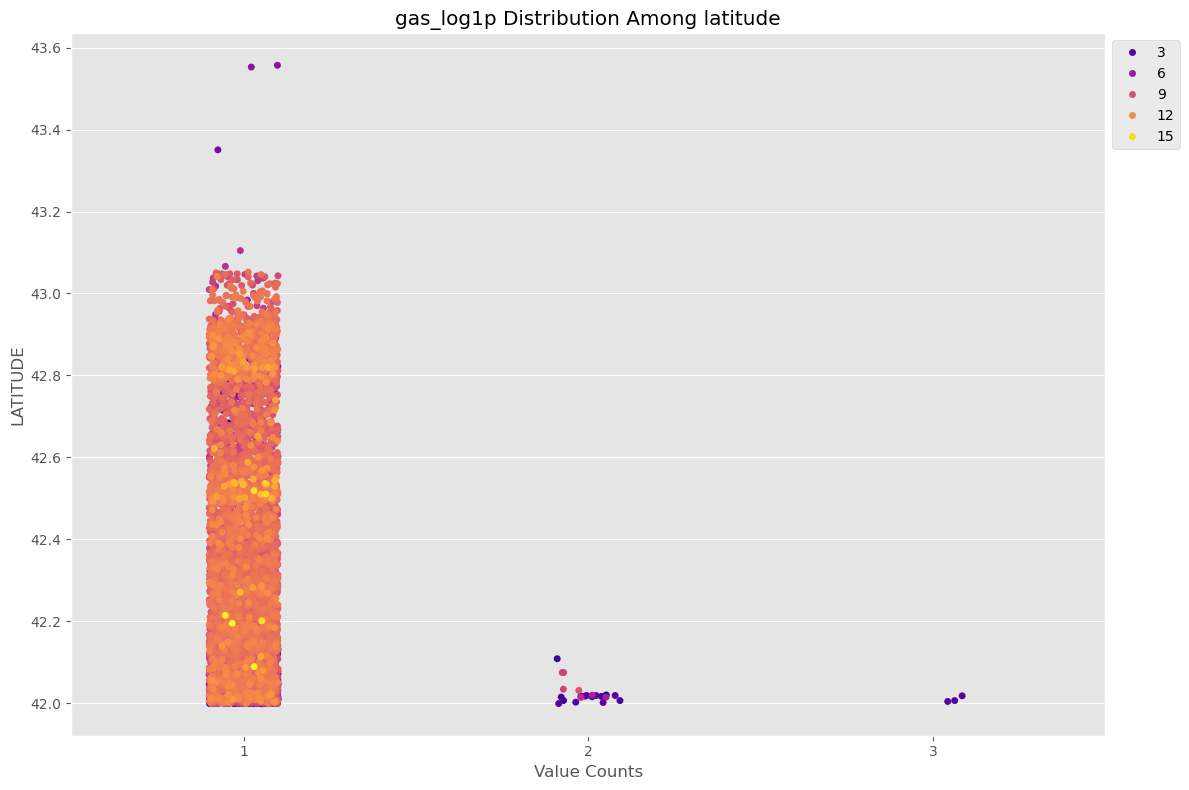


---------------
FEATURE: FIELD
---------------


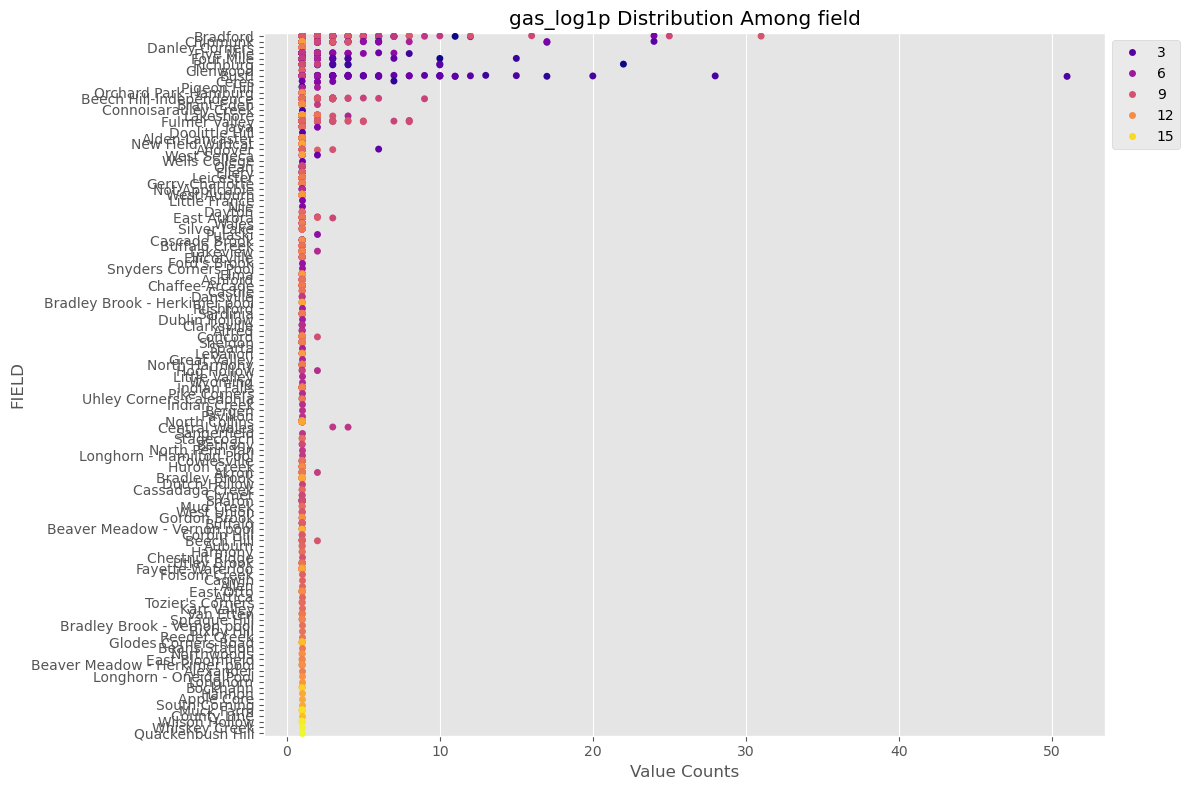


---------------
FEATURE: GEOLOGY
---------------


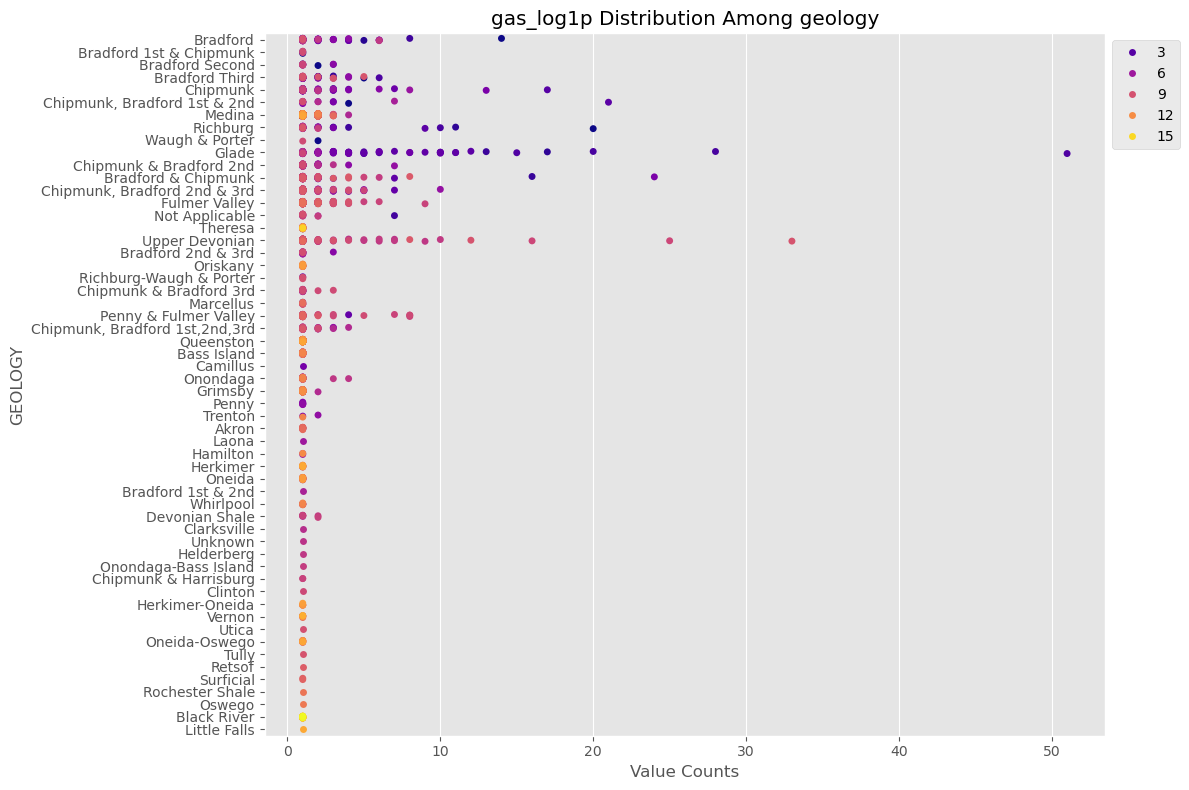

In [30]:
for column in df.columns:
    if column == 'gas_log1p':
        continue
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    groupby_gas_log1p = df.groupby(['gas_log1p', column]).size().rename('count').reset_index()
    fig, ax = plt.subplots(1, figsize=(12, 8))
    sns.stripplot(ax=ax, data=groupby_gas_log1p, x='count', y=column, hue='gas_log1p', palette='plasma')
    ax.set_title(f'gas_log1p Distribution Among {column}')
    ax.set_xlabel('Value Counts')
    ax.set_ylabel(column.upper())
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Stack Overflow, pulled code for annotation on barplots:
# https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot
    for p in ax.patches:
        if p.get_width() > 0:
            percentage = p.get_width() / df[column].value_counts().sum() * 100
            ax.annotate(format(f'{percentage:.0f}%'),
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(0, 0),  # Adjust spacing
                        textcoords='offset points', fontweight='semibold', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()
    plt.close()

## Script

In [31]:
try:
    print('Script executed successfully.')
except:
    print('FAILED')

Script executed successfully.
